In [1]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal as sg

In [2]:
def np_from_img(fname):
    return np.asarray(Image.open(fname), dtype=np.float32)

def save_as_img(ar, fname):
    Image.fromarray(ar.round().astype(np.uint8)).save(fname)

def norm(ar):
    return 255. * np.absolute(ar) / np.max(ar)

def gaussian_kernel(n, std, normalised=False):
    '''
    Generates a n x n matrix with a centered gaussian 
    of standard deviation std centered on it. If normalised,
    its volume equals 1.
    '''
    gaussian1D = sg.gaussian(n, std)
    gaussian2D = np.outer(gaussian1D, gaussian1D)
    
    if normalised:
        gaussian2D /= (2*np.pi*(std**2))
        
    return gaussian2D

In [3]:
file = 'test_images/bearing_scrached.jpg'
img = Image.open(file).convert('L')
#img.thumbnail((300,300))
img = np.array(img)

(<matplotlib.image.AxesImage at 0x7f61a9eb82b0>, (-0.5, 1969.5, 992.5, -0.5))

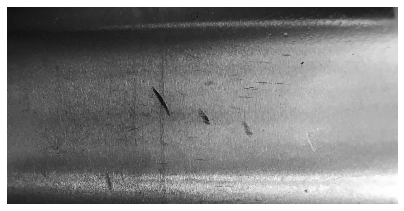

In [4]:
plt.figure(figsize=((7,7)))
plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.axis('off')

## Blur (Average)

In [5]:
box = np.ones((3,3)) / 9

$$ 
g_x = 
\frac{1}{9}\cdot
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1
\end{bmatrix}
$$

In [6]:
blurred_img = sg.convolve(img, box, "valid")

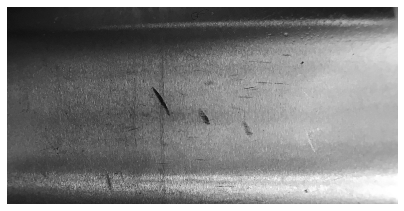

In [7]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(blurred_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(blurred_img, 'result_images/block_blur.jpg')

### Gaussian Blur

$$
g_{approx} =
\frac{1}{16}
\cdot
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$

In [8]:
gauss = np.array([[1,2,1],
                  [2,4,2],
                  [1,2,1]]) / 16

In [9]:
gauss = gaussian_kernel(3,0.84089642, normalised=True)
print((gauss*16).round())

[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]


In [10]:
blurred_img = sg.convolve(gauss, img, 'valid')

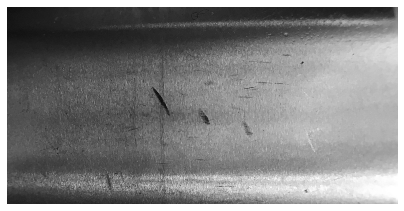

In [11]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(blurred_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(blurred_img, 'result_images/gauss_blur.jpg')

### Laplace edge detecion

$$ g =
\begin{bmatrix}
0 &  \ \ 1 & 0 \\
1 & -4 & 1 \\
0 &  \ \ 1 & 0
\end{bmatrix}
$$

In [12]:
lapl = np.array([[0,1,0],
                 [1,-4,1],
                 [0,1,0]])


In [13]:
lapl_edge_img = sg.convolve(vert_edg, img, 'valid')

NameError: name 'vert_edg' is not defined

In [ ]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(lapl_edge_img)), plt.axis('off')
save_as_img(norm(lapl_edge_img), 'result_images/edge_lapl.jpg')

## Sobel Edge Detection
### Vertical and Hotizontal Edges

In [ ]:
vert_edg = np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])

horr_edg = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])

In [ ]:
vert_edg_img = sg.convolve(vert_edg, img, 'valid')
horr_edg_img = sg.convolve(horr_edg, img, 'valid')

In [ ]:
fig, (vert_ax, horr_ax) = plt.subplots(1,2, figsize=(10,10))
vert_ax.imshow(norm(vert_edg_img)), vert_ax.axis('off')
horr_ax.imshow(norm(horr_edg_img)), horr_ax.axis('off')

save_as_img(norm(vert_edg_img), 'result_images/edges_vert.jpg')
save_as_img(norm(horr_edg_img), 'result_images/edges_horr.jpg')

In [ ]:
def gradient(vert_edg, horr_edg):
    return np.sqrt(np.power(vert_edg, 2) + np.power(horr_edg, 2))

In [ ]:
gradient_edg_img = gradient(vert_edg_img, horr_edg_img)
vert_edg.shape

In [ ]:
plt.figure(figsize=((7,7)))
plt.imshow(norm(gradient_edg_img)), plt.axis('off')
save_as_img(norm(gradient_edg_img), 'result_images/edges_gradiant.jpg')

## Sharpening

$$ g_x =
\begin{bmatrix}
0  & -1 &  0 \\
-1 &  5 & -1 \\
0  & -1 &  0
\end{bmatrix}
$$

In [ ]:
shapren = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

In [ ]:
shaprend_img = sg.convolve(shapren, img, 'valid')
plt.figure(figsize=((7,7)))
plt.imshow(norm(shaprend_img), cmap='gray', vmin=0, vmax=255), plt.axis('off')
save_as_img(norm(shaprend_img), 'result_images/shaprend.jpg')